ФИО:           Суббота Вадим Олегович

Город:         Новороссийск

Школа:         ЧОУ Гимназия N1

Класс:         10 "А"

В файле travel_time_data.csv содаржатся данные о времени поездки (в часах) в зависимости от расстояния до пункта назначения (в километрах). Нобходимо решить задачу линейной регрессии: создать и обучить модель линейной регрессии, которая будет способна прогнозировать время поездки по известному расстоянию до пункта назначения.
1. Загрузите данные из файла travel_time_data.csv
2. Визуализируйте данные.
3. Произведите разбиение данных на тренировочную и тестовую выборки.
4. Преобразуйте данные в массивы NumPy.
5. Воспользуйтесь классом `LinearRegression` для создания модели.
6. Обучите модель на тренировочных данных (используя метод `fit()`).
7. Спрогнозируйте время поездки для тренировочных и тестовых данных.
8. Визуализируйте на одном изображении решение линейной регрессии в виде прямой, соединяющей спрогнозированные значения и точки тестовых данных.
9. Оцените корректность работы модели при помощи функции `mean_squared_error()`.
10. Выведите на печать значения параметров модели.
11. Загрузить данные расстояний из файла travel_time_test.csv
12. Получить прогнозы для этих данных при помощи обученной модели.
13. Сохранить результаты в файл в формате csv.
14. Экспортировать код в формате html.

Прислать три файла:
- Файл с кодом в формате *.ipynb
- html формат кода
- Спрогнозированные результаты в формате csv

Имя каждого файла должно начинаться с фамилии и инициалов.

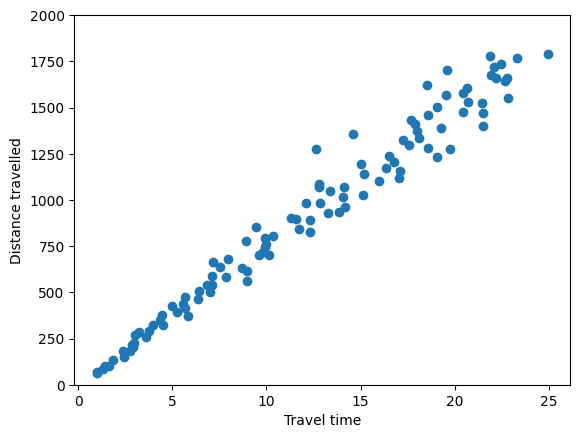

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

trains_travel_data = pd.read_csv("travel_time_train_data.csv")

x = trains_travel_data[' travel_time']
y = trains_travel_data["distance"]
plt.scatter(x, y)
plt.ylim(0, 2000)
plt.xlabel("Time travelled")
plt.ylabel("Distance travelled")
plt.show()




In [17]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(trains_travel_data, test_size=0.2, random_state=42)

test_data

,distance,travel_time
100,1704.13,19.59
10,215.71,2.84
4,103.55,1.45
81,1386.60,19.25
97,1658.41,22.79
65,1117.48,17.03
30,540.37,6.87
33,586.73,7.09
93,1577.06,20.44
11,224.27,2.95


In [18]:
x_train = train_data[' travel_time'].to_numpy()
y_train = train_data['distance'].to_numpy()

x_test = test_data[' travel_time'].to_numpy()
y_test = test_data['distance'].to_numpy()






In [21]:
x_train = x_train.reshape((84, 1))
x_test = x_test.reshape((22, 1))
print(f"{x_train.shape = }")
print(f"{x_test.shape = }")

x_train.shape = (84, 1)
x_test.shape = (22, 1)


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_test_predicted = model.predict(x_test)

# напечатаем результат в виде таблицы
header = f"x_test\ty_test\ty_test_predicted"
print(header, '\n', '-'*len(header), sep='')
for j in range(10):
    i = np.random.randint(0, len(y_test))
    print(f"{x_test[i]}\t{y_test[i]}\t{int(y_test_predicted[i])}")

x_test	y_test	y_test_predicted
------------------------------
[17.03]	1117.48	1273
[6.87]	540.37	528
[14.16]	963.75	1063
[19.59]	1704.13	1461
[18.01]	1373.93	1345
[9.95]	747.45	754
[7.09]	586.73	544
[4.36]	352.02	344
[19.25]	1386.6	1436
[22.79]	1658.41	1696


Text(0, 0.5, 'Distance travelled')

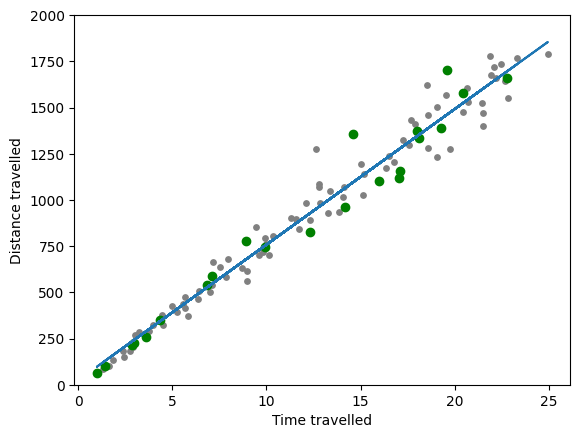

In [23]:
y_train_predicted = model.predict(x_train.reshape(-1, 1))

plt.scatter(x_train, y_train, c='grey', s=15)
plt.scatter(x_test, y_test, c='green')
plt.plot(x_train, y_train_predicted)
plt.ylim(0, 2000)

plt.xlabel('Time travelled')
plt.ylabel('Distance travelled')

In [26]:
from sklearn.metrics import mean_squared_error as mse 
train_Rmse = mse(y_train, y_train_predicted, squared=0)
test_Rmse = mse(y_test, y_test_predicted, squared=0)
print(f"{train_Rmse = },{test_Rmse = }")

train_Rmse = 84.5836819149624,test_Rmse = 99.90131333841319


In [28]:
times_data = pd.read_csv('travel_time_test.csv')

x = times_data.to_numpy()
y = model.predict(x)
y[:5]

array([ 4734.2565618 ,  6448.79990339,  9084.80941402, 11507.32636479,
       13153.64012539])

In [30]:
np.savetxt(
            "train_travel_distance_prediction.csv",y,
            header= "train_travel_distance",
            delimiter=",",
            fmt= "%.2f",
            comments=""
            )